# 用pandas預測你的人生財務曲線

In [19]:
# 起始資金 = 30
# 每月薪水 = 3
# 每月開銷 = 1 # 不含房租
# 每月房租 = 1
# 退休年齡 = 65
# 預測時段 = range(25, 90, 1)

### 每年淨額 計算
每年淨額就是每年銀行帳戶的變化值，也就是當年的**總收入** - **總支出**
* 收入的部分有：薪水
* 支出的部分有：開銷、房租

同時必須考慮起始資金跟退休年齡！



In [18]:
funds = 30
salary = 3
cost_per_month = 1
rent = 1
retire_age = 65
periods = range(25, 90, 1)

In [19]:
# import pandas as pd

# # 每年淨額
# 每年淨額 = pd.Series(0, index=預測時段)
# 每年淨額.iloc[0] = 起始資金
# 每年淨額.loc[:退休年齡] += 每月薪水 * 12
# 每年淨額 -= (每月開銷 + 每月房租) * 12

# %matplotlib inline
# 每年淨額.plot()

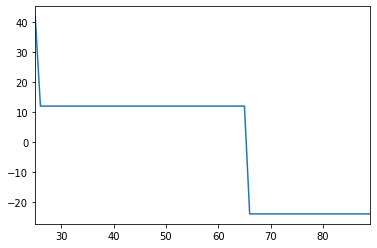

In [20]:
import pandas as pd

# benefit_per_year without buying house & investment
benefit_per_year = pd.Series(0, index=periods)
benefit_per_year.iloc[0] = funds
benefit_per_year.loc[:retire_age] += salary * 12
benefit_per_year -= (cost_per_month + rent) * 12

%matplotlib inline
benefit_per_year.plot()

### 沒有投資的總資產變化情況

In [21]:
# # 無投資總資產

# 無投資總資產 = 每年淨額.cumsum()
# 無投資總資產.plot()

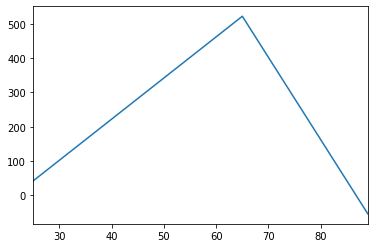

In [22]:
no_invest_no_house_asset = benefit_per_year.cumsum()
no_invest_no_house_asset.plot()

### 有投資的總資產變化情況

每年，我們都審視前年的帳戶，將資金分成兩份
* 投資金額 = 總帳戶金額 * 投資部位
* 存在帳戶裡不動錢 = 總帳戶金額 * (1 - 投資部位)

所以今年底的帳戶餘額 = 投資金額 * 投資年利率 + 存在帳戶裡不動的錢 + 今年淨額

於是我們可以寫一個函式代表每年的資產增加變化：

In [23]:
benefit_per_year.iloc[0]

42

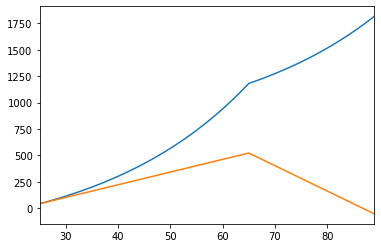

In [24]:
invest_rate = 0.7
return_rate = 1.05

def invest_asset(benefit_per_year, invest_rate, return_rate):
    invest_asset = [benefit_per_year.iloc[0]]
    for benefit in benefit_per_year[1:]:
        invest_asset.append(invest_asset[-1] * invest_rate * return_rate + invest_asset[-1] * (1 - invest_rate) + benefit)
    return pd.Series(invest_asset, periods)

invest_no_house_asset = invest_asset(benefit_per_year, invest_rate, return_rate)
invest_no_house_asset.plot()
no_invest_no_house_asset.plot()

In [25]:
# 投資部位 = 0.7
# 投資年利率 = 5 # 跟影片中不太一樣，影片中：1.05，改成 5% 來表示，比較好理解，也就是一年有5％的報酬率

# def compound_interest(arr, ratio, return_rate):
#     ret = [arr.iloc[0]]
#     for v in arr[1:]:
#         ret.append(ret[-1] * ratio * (return_rate/100+1) + ret[-1] * (1 - ratio) + v)
#     return pd.Series(ret, 預測時段)

# 投資總資產 = compound_interest(每年淨額, 投資部位, 投資年利率)
# 投資總資產.plot()
# 無投資總資產.plot()

# 考慮買房的話
* 假設買房總共要花「買房價格」
* 然後一開始，我們會付「買房頭期款」
* 在到達「買房年紀」以前，先租房；從「買房年紀」以後，就是負貸款
* 設定「貸款年數」，設定究竟想要貸款幾年
* 貸款就得付「房貸利率」（％）！

In [26]:
house_price = 300
down_payment = 100
house_buying_age = 35
mortgage_rate = 3
mortgage_year = 20

In [27]:
# 買房價格 = 300
# 買房頭期款 = 100
# 買房年紀 = 35
# 房貸利率 = 3
# 貸款年數 = 20

# 先計算每年的買房花費

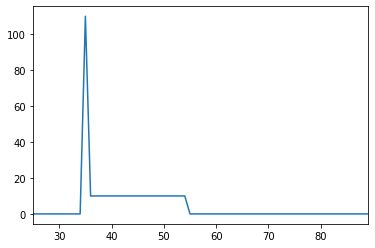

In [28]:
house_buying_cost = pd.Series(0, index=periods)
house_buying_cost[house_buying_age] = down_payment
house_buying_cost.loc[house_buying_age: house_buying_age + mortgage_year - 1] += (house_price - down_payment) / mortgage_year
house_buying_cost.plot()

In [29]:
# 買房花費 = pd.Series(0, index=預測時段)
# 買房花費[買房年紀] = 買房頭期款
# 買房花費.loc[買房年紀:買房年紀+貸款年數-1] += (買房價格 - 買房頭期款) / 貸款年數
# 買房花費.plot()

# 接下來計算貸款的利息

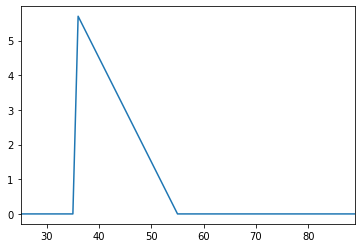

In [30]:
overdraft = pd.Series(0, index=periods)
overdraft[house_buying_age] = house_price
overdraft = overdraft.cumsum()
overdraft = overdraft - house_buying_cost.cumsum()
interest_expend = overdraft.shift().fillna(0) * mortgage_rate / 100
interest_expend.plot()

In [31]:
# # 先計算有多少欠款
# 欠款 = pd.Series(0, index=預測時段)
# 欠款[買房年紀] = 買房價格
# 欠款 = 欠款.cumsum()
# 欠款 = 欠款 - 買房花費.cumsum()
# #欠款.plot()
# #
# 利息 = 欠款.shift().fillna(0) * 房貸利率 / 100
# 利息.plot()

# 計算繳房租

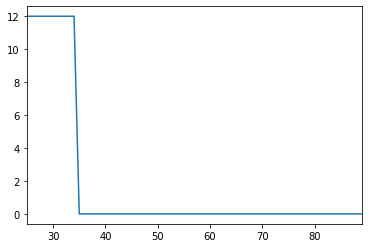

In [32]:
rent_per_year = pd.Series(rent*12, index=periods)
rent_per_year.loc[house_buying_age:] = 0
rent_per_year.plot()

In [33]:
# 房租年繳 = pd.Series(每月房租*12, index=預測時段)
# 房租年繳.loc[買房年紀:] = 0
# 房租年繳.plot()

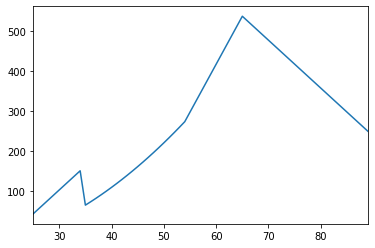

In [34]:
no_invest_house_benefit = pd.Series(0, index=periods)
no_invest_house_benefit.iloc[0] = funds
no_invest_house_benefit.loc[:retire_age] += salary * 12
no_invest_house_benefit -= (cost_per_month*12 + rent_per_year + interest_expend + house_buying_cost)
no_invest_house_asset = no_invest_house_benefit.cumsum()
no_invest_house_asset.plot()

In [35]:
# 每年淨額_買房 = pd.Series(0, index=預測時段)
# 每年淨額_買房.iloc[0] = 起始資金
# 每年淨額_買房.loc[:退休年齡] += 每月薪水 * 12
# 每年淨額_買房 -= (每月開銷*12 + 房租年繳 + 利息 + 買房花費)
# 每年淨額_買房.cumsum().plot()
# #每年淨額_買房.plot()

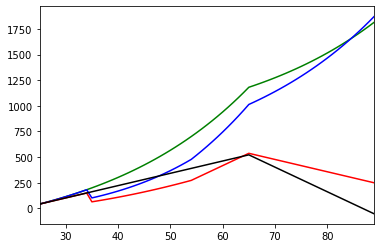

In [38]:
# invest_house_asset = invest_asset(no_invest_house_benefit, invest_rate, return_rate)

invest_asset(benefit_per_year, invest_rate, return_rate).plot(c='green')
invest_asset(no_invest_house_benefit, invest_rate, return_rate).plot(c='blue')
no_invest_house_asset.plot(c='red')
no_invest_no_house_asset.plot(c='black')

In [85]:
# 投資_買房_總資產 = compound_interest(每年淨額_買房, 投資部位, 投資年利率)
# #
# 投資總資產.plot(color='green')
# 投資_買房_總資產.plot(color='blue')
# 每年淨額_買房.cumsum().plot(color='red')
# 無投資總資產.plot(color='black')

In [41]:
import pandas as pd
import random
%matplotlib inline

def asset_prediction(funds, 
                     start_age, 
                     salary, 
                     cost_per_month, 
                     rent, retire_age, 
                     invest_rate, 
                     return_rate, 
                     house_price, 
                     down_payment, 
                     house_buying_age, 
                     mortgage_rate, 
                     mortgage_year):
    
    periods = range(start_age, 100)
    
    # benefit_per_year without buying house & investment
    benefit_per_year = pd.Series(0, index=periods)
    benefit_per_year.iloc[0] = funds
    benefit_per_year.loc[:retire_age] += salary * 12
    benefit_per_year -= (cost_per_month + rent) * 12
    
    #considering investment
    def invest_asset(benefit_per_year, invest_rate, return_rate):
        invest_asset = [benefit_per_year.iloc[0]]
        for benefit in benefit_per_year[1:]:
            invest_asset.append(invest_asset[-1] * invest_rate * (return_rate/100 + 1) + invest_asset[-1] * (1 - invest_rate) + benefit)
        return pd.Series(invest_asset, periods)
    
    #house buying cost
    house_buying_cost = pd.Series(0, index=periods)
    house_buying_cost[house_buying_age] = down_payment
    house_buying_cost.loc[house_buying_age: house_buying_age + mortgage_year - 1] += (house_price - down_payment) / mortgage_year
  
    #overdraft
    overdraft = pd.Series(0, index=periods)
    overdraft[house_buying_age] = house_price
    overdraft = overdraft.cumsum()
    overdraft = overdraft - house_buying_cost.cumsum()
    interest_expend = overdraft.shift().fillna(0) * mortgage_rate / 100
    
    #rent cost if buying house
    rent_per_year = pd.Series(rent*12, index=periods)
    rent_per_year.loc[house_buying_age:] = 0

    #no investment but buying house
    no_invest_house_benefit = pd.Series(0, index=periods)
    no_invest_house_benefit.iloc[0] = funds
    no_invest_house_benefit.loc[:retire_age] += salary * 12
    no_invest_house_benefit -= (cost_per_month*12 + rent_per_year + interest_expend + house_buying_cost)
    
    pd.DataFrame({
        'no invest, no house': benefit_per_year.cumsum(),
        'invest, no house': invest_asset(benefit_per_year, invest_rate, return_rate),
        'no invest, house': no_invest_house_benefit.cumsum(),
        'invest, house': invest_asset(no_invest_house_benefit, invest_rate, return_rate),
    }).plot()
    
    
    import matplotlib.pylab as plt
    plt.ylim(0, None)
    
    print('mortgage per month: ', (house_price - down_payment) / mortgage_year / 12)
    print('interest_expend', interest_expend.sum() / mortgage_year)
    print('unit: 10 thousands')

import ipywidgets as widgets
widgets.interact(asset_prediction, 
    funds = widgets.FloatSlider(min=0, max=100, step=10, value=20),
    start_age = widgets.IntSlider(min=0, max=100, step=1, value=30),
    salary = widgets.FloatSlider(min=0, max=20, step=0.1, value=3),
    cost_per_month = widgets.FloatSlider(min=0, max=20, step=0.2, value=1),
    rent = widgets.FloatSlider(min=0, max=20, step=0.5, value=1),
    retire_age = widgets.IntSlider(min=0, max=100, step=1, value=60),
    invest_rate = widgets.FloatSlider(min=0, max=1, step=0.1, value=0.7),
    return_rate = widgets.FloatSlider(min=0, max=20, step=0.5, value=5),
    house_price = widgets.IntSlider(min=100, max=2000, step=50, value=300),
    down_payment = widgets.IntSlider(min=100, max=2000, step=50, value=100),
    house_buying_age = widgets.IntSlider(min=20, max=100, step=1, value=40),
    mortgage_rate = widgets.FloatSlider(min=1, max=5, step=0.1, value=2.4),
    mortgage_year = widgets.IntSlider(min=0, max=40, step=1, value=20)
)


interactive(children=(FloatSlider(value=20.0, description='funds', step=10.0), IntSlider(value=30, description…

<function __main__.asset_prediction(funds, start_age, salary, cost_per_month, rent, retire_age, invest_rate, return_rate, house_price, down_payment, house_buying_age, mortgage_rate, mortgage_year)>

In [1]:
import pandas as pd
import random
%matplotlib inline
def asset_prediction(起始資金 ,起始年紀,
    每月薪水 ,
    每月開銷 ,
    每月房租 ,
    退休年齡 ,
    投資部位,
    投資年利率,
    買房價格,
    買房頭期款,
    買房年紀,
    房貸利率,
    貸款年數,):

    預測時段 = range(起始年紀, 100)
    每年淨額 = pd.Series(0, index=預測時段)
    每年淨額.iloc[0] = 起始資金
    每年淨額.loc[:退休年齡] += 每月薪水 * 12
    每年淨額 -= (每月開銷 + 每月房租) * 12
    
    
    def compound_interest(arr, ratio, return_rate):
        ret = [arr.iloc[0]]
        for v in arr[1:]:
            ret.append(ret[-1] * ratio * (return_rate/100 + 1) + ret[-1] * (1 - ratio) + v)
        return pd.Series(ret, 預測時段)
    
    買房花費 = pd.Series(0, index=預測時段)
    買房花費[買房年紀] = 買房頭期款
    買房花費.loc[買房年紀:買房年紀+貸款年數-1] += (買房價格 - 買房頭期款) / 貸款年數
    
    欠款 = pd.Series(0, index=預測時段)
    欠款[買房年紀] = 買房價格
    欠款 = 欠款.cumsum()
    欠款 = 欠款 - 買房花費.cumsum()
    利息 = 欠款.shift().fillna(0) * 房貸利率 / 100


    房租年繳 = pd.Series(每月房租*12, index=預測時段)
    房租年繳.loc[買房年紀:] = 0
    
    每年淨額_買房 = pd.Series(0, index=預測時段)
    每年淨額_買房.iloc[0] = 起始資金
    每年淨額_買房.loc[:退休年齡] += 每月薪水 * 12
    每年淨額_買房 -= (每月開銷*12 + 房租年繳 + 利息 + 買房花費)
    
    
    
    pd.DataFrame({
        'no invest, no house': 每年淨額.cumsum(),
        'invest, no house': compound_interest(每年淨額, 投資部位, 投資年利率),
        'no invest, house': 每年淨額_買房.cumsum(),
        'invest, house': compound_interest(每年淨額_買房, 投資部位, 投資年利率),
        
    }).plot()

    
    import matplotlib.pylab as plt
    plt.ylim(0, None)
    
    print('月繳房貸', (買房價格 - 買房頭期款) / 貸款年數 / 12)
    print('利息', 利息.sum() / 貸款年數)
    print('')

import ipywidgets as widgets
widgets.interact(asset_prediction, 
    起始資金=widgets.FloatSlider(min=0, max=100, step=10, value=20),
    起始年紀=widgets.IntSlider(min=0, max=100, step=1, value=30),
    每月薪水=widgets.FloatSlider(min=0, max=20, step=0.1, value=3),
    每月開銷=widgets.FloatSlider(min=0, max=20, step=0.2, value=1),
    每月房租=widgets.FloatSlider(min=0, max=20, step=0.5, value=1),
    退休年齡=widgets.IntSlider(min=0, max=100, step=1, value=60),
    投資部位=widgets.FloatSlider(min=0, max=1, step=0.1, value=0.7),
    投資年利率=widgets.FloatSlider(min=0, max=20, step=0.5, value=5),
    買房價格=widgets.IntSlider(min=100, max=2000, step=50, value=300),
    買房頭期款=widgets.IntSlider(min=100, max=2000, step=50, value=100),
    買房年紀=widgets.IntSlider(min=20, max=100, step=1, value=40),
    房貸利率=widgets.FloatSlider(min=1, max=5, step=0.1, value=2.4),
    貸款年數=widgets.IntSlider(min=0, max=40, step=1, value=20)
)

interactive(children=(FloatSlider(value=20.0, description='起始資金', step=10.0), IntSlider(value=30, description=…

<function __main__.asset_prediction(起始資金, 起始年紀, 每月薪水, 每月開銷, 每月房租, 退休年齡, 投資部位, 投資年利率, 買房價格, 買房頭期款, 買房年紀, 房貸利率, 貸款年數)>

### 結論

1. 絕對要開始投資，讓資產報酬率在每年5％就差很多了！
2. 買不買房差很大！
3. 投資部位很重要